### Working with numpy

NumPy provides optimized functionality for a large number of array-based operations.
NumPy arrays form the core of the Python ecosystem for data analysis - including Pandas

Many data types can be thought of as arrays: time series, image data

Efficient storage and manipulation of numerical arrays is fundamental to data analysis.

NumPy arrays are similar to python lists but much more efficient

Why is Python slow

Because of dynamic typing, Python variables are more than just their values
 
values are not stored in dense buffers but in scattered objects. 

When the program executes, the interpreter doesn't know the type of the variables that are defined.

C requires all variables to be typed.

    /* C code */
    int a = 1;
    int b = 2;
    int c = a + b;

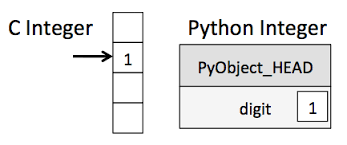

In [ ]:
# python code
a = 1
b = 2
c = a + b

A C integer is a label to a position in memory.

A Python integer is a pointer to a position in memory containing all of the Python object information- both its data type and its value
 

The interpreter knows only that 1 and 2 are objects, but not what type of object they are. 

So the interpreter must inspect PyObject_HEAD for each variable to find the type information, and then call the appropriate summation routine for the two types.

Finally it must create and initialize a new Python object to hold the return value.

A NumPy array in its simplest form is a Python object build around a C array. That is, it has a pointer to a contiguous data buffer of values. A Python list, on the other hand, has a pointer to a contiguous buffer of pointers, each of which points to a Python object which in turn has references to its data (in this case, integers). This is a schematic of what the two might look like:

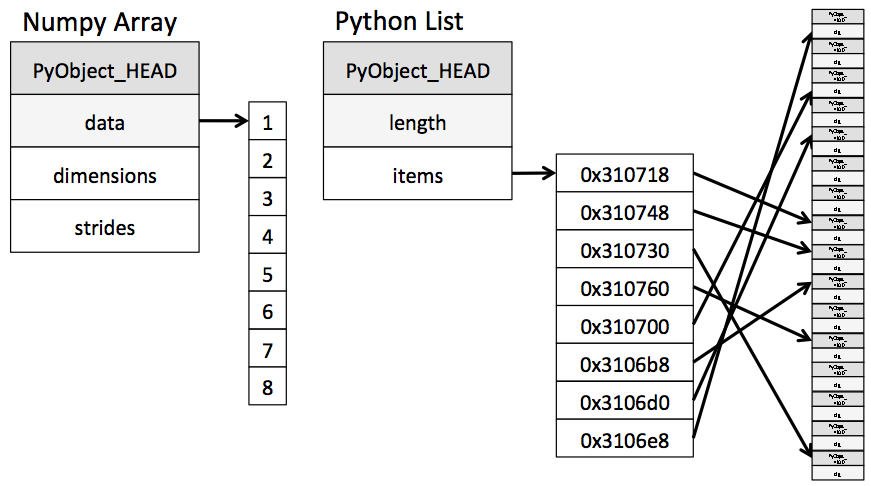

An array contains a single pointer to one contiguous block of data.

The Python list contains a pointer to a block of pointers each of which points to a full Python object.


NumPy has an efficient ndarray object plus efficient operations for this array.

The constraint is that the array must contain all of the same data type.

In [1]:
import numpy as np

We can create an array from a list

In [2]:
np.array([1,4,5,9,3])

array([1, 4, 5, 9, 3])

For a list containing integers and floats numpy can up cast the integers to floats.

In [3]:
np.array([1,4,5.6,9,3.5])

array([1. , 4. , 5.6, 9. , 3.5])

To explicitly specify the data type for the array , add the dtype to the assignment.

In [4]:
np.array([1,4,5,9,3], dtype='float32')

array([1., 4., 5., 9., 3.], dtype=float32)

Create arrays from scratch

In [5]:
np.zeros(8, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

Arrays can be created using the linspace function.
 
This function creates an array of N evenly spaced points between a starting point and an ending point.

The form of the function is linspace(start, stop, N). If the third argument N is omitted, then N=50.

In [12]:
b=np.linspace(0,10,5)
b

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

### Numpy standard data types

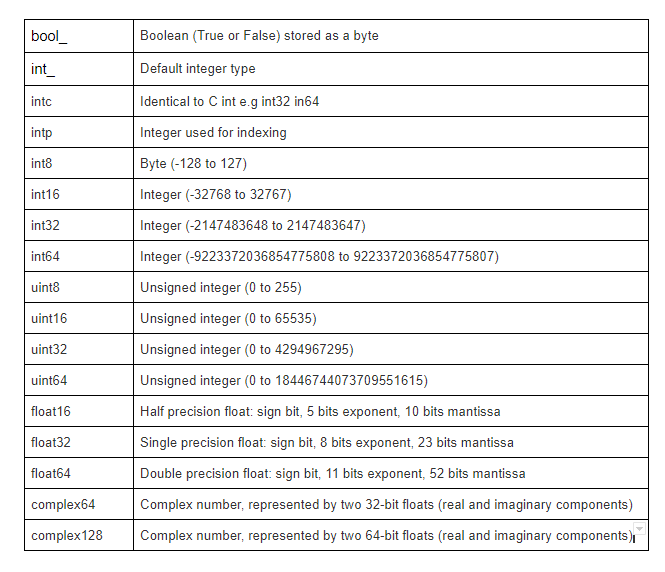

#### Numpy Basics

- array attributes-dimension, size and shape
- indexing
- slicing
- reshaping
- joining and spliting


Each array has attributes ndim (number of dimensions), shape (the size of each dimension), size (the total size of the array)

In [13]:
np.random.seed(0)
a1=np.random.randint(10, size=8)
a2=np.random.randint(10, size=(2,4))
a3=np.random.randint(10, size=(2,3,4))

In [14]:
a1

array([5, 0, 3, 3, 7, 9, 3, 5])

In [15]:
a2

array([[2, 4, 7, 6],
       [8, 8, 1, 6]])

In [16]:
a3

array([[[7, 7, 8, 1],
        [5, 9, 8, 9],
        [4, 3, 0, 3]],

       [[5, 0, 2, 3],
        [8, 1, 3, 3],
        [3, 7, 0, 1]]])

In [17]:
a3.dtype

dtype('int64')

In [18]:
a3.size

24

### Array indexing

Similar to Python lists, you can access array elements by specifying the desired index in square brackets.

negative indices work the same


In [19]:
a1[-3]

9

For multidimensional arrays you need to use a comma separted pair of indices.

In [20]:
a2[1,1]

8

array values can be changed by assigning a new value using the index

In [21]:
a2[1,1]=7

In [22]:
a2

array([[2, 4, 7, 6],
       [8, 7, 1, 6]])

Arrays can be sliced to access sub-arrays. 

A slice of an array can be specified with start:stop:step 

In [23]:
z=np.arange(10)
z

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
z[4:7] #from index 4 up to but not including 7

array([4, 5, 6])

In [25]:
z[::3] # returns every third value

array([0, 3, 6, 9])

Multidimensional slicing works the same way

In [26]:
print (a2)
a2[0,1]

[[2 4 7 6]
 [8 7 1 6]]


4

In [27]:
a3

array([[[7, 7, 8, 1],
        [5, 9, 8, 9],
        [4, 3, 0, 3]],

       [[5, 0, 2, 3],
        [8, 1, 3, 3],
        [3, 7, 0, 1]]])

In [32]:
a3[1,2,0]=8
a3

array([[[7, 7, 8, 1],
        [5, 9, 8, 9],
        [4, 3, 0, 3]],

       [[5, 0, 2, 3],
        [8, 1, 3, 3],
        [8, 7, 0, 1]]])

In [40]:
 a3[:1,:2, :2]
 

array([[[7, 7],
        [5, 9]]])

Accessing rows and columns

In [41]:
a2[:,0] # gets first column

array([2, 8])

In [42]:
a2[0,:] # gets first row

array([2, 4, 7, 6])

Array slices return views rather than copies which is different than the case for list slices


In [43]:
z2=np.random.randint(10, size=(3,4))
z2

array([[9, 9, 0, 4],
       [7, 3, 2, 7],
       [2, 0, 0, 4]])

In [44]:
zsub=z2[:2,:2]
zsub

array([[9, 9],
       [7, 3]])

In [45]:
zsub=z2[:,2:]
zsub

array([[0, 4],
       [2, 7],
       [0, 4]])

Data subsets can be accessed and changed in place without having to copy the array.

In [46]:
zsub[1,1]=13
zsub
z2

array([[ 9,  9,  0,  4],
       [ 7,  3,  2, 13],
       [ 2,  0,  0,  4]])

### Reshaping arrays

In [47]:
a4=np.array([1,2,3])
a4

array([1, 2, 3])

In [48]:
a4.reshape(3,1)

array([[1],
       [2],
       [3]])

Concatentate arrays with np.concatenate.

Combine mixed arrays with np.vstack, or np.hstack

In [49]:
agrid=np.array([[1,2,3], [4,5,6]])
agrid

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
np.concatenate([agrid,agrid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [51]:
a5=np.array([8,9,10])

In [52]:
np.vstack([a5,agrid])

array([[ 8,  9, 10],
       [ 1,  2,  3],
       [ 4,  5,  6]])

In [53]:
a6=np.array([99,99,99])
a6

array([99, 99, 99])

In [54]:
np.vstack([agrid,a6])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [99, 99, 99]])

In [55]:
a6=np.array([[99],
            [98]])
a6

array([[99],
       [98]])

In [56]:
a6=np.array([99,98])
a6


array([99, 98])

In [57]:
a7=a6.reshape(2,1)
a7

array([[99],
       [98]])

In [58]:
agrid

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
np.hstack([agrid, a7])

array([[ 1,  2,  3, 99],
       [ 4,  5,  6, 98]])

The split function can be used to split arrays at specified indices

These include: np.split, np.hsplit, np.vsplit

The arguments are a list of split points

In [61]:
print(a4)
np.split(a4,[2])

[1 2 3]


[array([1, 2]), array([3])]

In [62]:
bgrid=np.arange(16).reshape((4,4))
bgrid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [63]:
np.vsplit(bgrid,[2])

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [64]:
np.hsplit(bgrid,[2])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

### Using numpy to represent images

RGB images are usually stored as 3 dimensional arrays of 8-bit unsigned integers. 

A three-dimensional array of (height, width, channels), where the channels are usually red, green, and blue (RGB) values. 

An image is made up of lines, lines are composed of pixels, pixels have 3 values
The shape of the array is:

height x width x 3.

Each colour is represented by an unsigned byte (numpy type uint8)

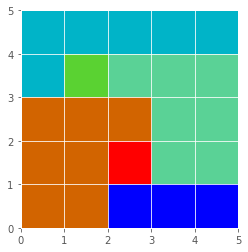

#### Can you replicate this image using NumPy array operations?

In [67]:
width = 5
height = 5

iarray = np.zeros([height, width, 3], dtype=np.uint8)
iarray

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [70]:
iarray[:,:] = [0, 180, 200]
iarray

array([[[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]]], dtype=uint8)

In [71]:
img = iarray

In [72]:
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline
plt.style.use('ggplot')

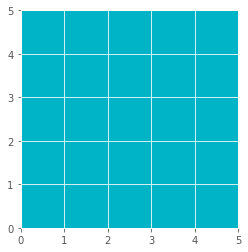

In [74]:
imgplot = plt.imshow(img, origin='upper', extent=[0,5,0,5], aspect='equal')

In [75]:
iarray

array([[[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]],

       [[  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200],
        [  0, 180, 200]]], dtype=uint8)

### Vectorization

Use of vectorized operations 
- operations do not need to check for type.
- operations as occurring on entire arrays rather than their individual elements


Because NumPy arrays have a homogeneous data type, NumPy can perform mathematical operations on the array’s contents as optimized, compiled C code. 


Vectorized operations are computed with universal functions: Ufuncs

Two types: unary and binary
Standard addition, subtraction, multipication, and division operators can be applied.



In [76]:
z=np.arange(5)
print("z   =", z)
print("z + 5=", z+5)
print("z - 3=", z-3)
print("z * 2=", z*2)
print("z / 2=", z/2)

z   = [0 1 2 3 4]
z + 5= [5 6 7 8 9]
z - 3= [-3 -2 -1  0  1]
z * 2= [0 2 4 6 8]
z / 2= [0.  0.5 1.  1.5 2. ]


In [77]:
big=np.random.rand(1000)
%timeit sum(big)
%timeit np.sum(big)

164 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.29 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [79]:
%timeit min(big)
%timeit np.min(big)

110 µs ± 7.41 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.16 µs ± 94.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


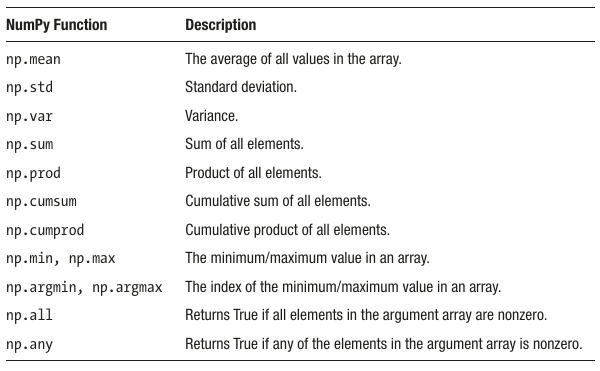

In [80]:
import pandas as pd

In [82]:
py=pd.read_csv('/Users/antoniojurlina/Google Drive/Spring 2021/SIE 598/data/Passing_Yards.csv')

In [83]:
py.head()

,Rank,Player,Team,Pos,Passing_Yds
0,1,Tom Brady,Tampa Bay Buccaneers,QB,5493
1,2,Josh Allen,Buffalo Bills,QB,5361
2,3,Patrick Mahomes,Kansas City Chiefs,QB,5320
3,4,Aaron Rodgers,Green Bay Packers,QB,4941
4,5,Deshaun Watson,Houston Texans,QB,4823


In [84]:
py.shape

(50, 5)

In [87]:
teamset=set((py['Team']))
teamset

{'Arizona Cardinals',
 'Atlanta Falcons',
 'Baltimore Ravens',
 'Buffalo Bills',
 'Carolina Panthers',
 'Chicago Bears',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Dallas Cowboys',
 'Denver Broncos',
 'Detroit Lions',
 'Green Bay Packers',
 'Houston Texans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Las Vegas Raiders',
 'Los Angeles Chargers',
 'Los Angeles Rams',
 'Miami Dolphins',
 'Minnesota Vikings',
 'New England Patriots',
 'New Orleans Saints',
 'New York Giants',
 'New York Jets',
 'Philadelphia Eagles',
 'Pittsburgh Steelers',
 'San Francisco 49ers',
 'Seattle Seahawks',
 'Tampa Bay Buccaneers',
 'Tennessee Titans',
 'Washington Football Team'}

In [86]:
len(teamset)

32

In [89]:
pyds=np.array(py['Passing_Yds'])
pyds

array([5493, 5361, 5320, 4941, 4823, 4581, 4478, 4386, 4336, 4304, 4281,
       4265, 4103, 4084, 4030, 3984, 3971, 3733, 3341, 3098, 2943, 2933,
       2688, 2657, 2620, 2437, 2259, 2254, 2208, 2170, 2091, 1856, 1852,
       1814, 1582, 1439, 1096, 1072, 1061,  928,  925,  864,  787,  624,
        610,  443,  432,  375,  368,  324])

In [90]:
print(np.max(pyds))
print(np.min(pyds))
print(np.mean(pyds))
print(np.median(pyds))

5493
324
2652.5
2528.5


In [91]:
np.percentile(pyds,75)

4098.25

In [92]:
import matplotlib.pyplot as plt

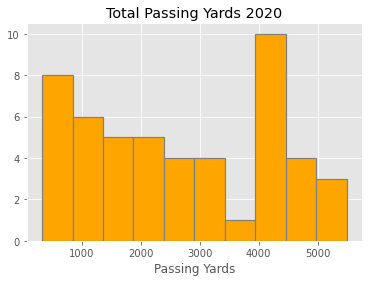

In [93]:
%matplotlib inline
plt.style.use('ggplot')
plt.hist(pyds, color='orange',edgecolor='gray', linewidth=1.2)
plt.title("Total Passing Yards 2020")
plt.xlabel("Passing Yards")
plt.show()